In [22]:
import pandas as pd

# 数据加载
train = pd.read_csv('./train.csv')
train

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
...,...,...,...
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580


In [23]:
train['Datetime'] = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
# 将Datetime作为train的索引
train.index = train.Datetime
train

,ID,Datetime,Count
Datetime,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2
...,...,...,...
2014-09-25 19:00:00,18283,2014-09-25 19:00:00,868
2014-09-25 20:00:00,18284,2014-09-25 20:00:00,732
2014-09-25 21:00:00,18285,2014-09-25 21:00:00,702


In [24]:
train.drop(['ID','Datetime'], axis = 1, inplace=True)
train

,Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2
...,...
2014-09-25 19:00:00,868
2014-09-25 20:00:00,732
2014-09-25 21:00:00,702


In [25]:
daily_train = train.resample('D').sum()
print(daily_train.head())
daily_train['ds'] = daily_train.index
daily_train['y'] = daily_train.Count
daily_train.drop(['Count'], axis = 1, inplace = True)
daily_train

Count
Datetime         
2012-08-25     76
2012-08-26     88
2012-08-27     62
2012-08-28     58
2012-08-29     60


,ds,y
Datetime,,
2012-08-25,2012-08-25,76
2012-08-26,2012-08-26,88
2012-08-27,2012-08-27,62
2012-08-28,2012-08-28,58
2012-08-29,2012-08-29,60
...,...,...
2014-09-21,2014-09-21,9102
2014-09-22,2014-09-22,14116
2014-09-23,2014-09-23,13304


In [26]:
from fbprophet import Prophet
# 拟合prophet预测
m = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.1)
m.fit(daily_train)
# 预测未来7个月，213天
future = m.make_future_dataframe(periods=213)
forecast = m.predict(future)
print(forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
            ds         trend    yhat_lower    yhat_upper   trend_lower  \
0   2012-08-25   -686.475171  -2273.067536    122.802658   -686.475171   
1   2012-08-26   -678.372660  -2455.171692   -157.801084   -678.372660   
2   2012-08-27   -670.270149   -851.434027   1499.398095   -670.270149   
3   2012-08-28   -662.167638   -662.573031   1686.095117   -662.167638   
4   2012-08-29   -654.065127   -705.587823   1516.879597   -654.065127   
..         ...           ...           ...           ...           ...   
970 2015-04-22  16243.879057  15352.493340  17849.620462  15809.138503   
971 2015-04-23  16271.394404  15040.250183  17536.473834  15834.208436   
972 2015-04-24  16298.909751  14887.157656  17384.124898  15859.191757   
973 2015-04-25  16326.425097  13723.813446  16160.032705  15884.175078   
974 2015-04-26  16353.940444  13510.607491  16017.192743  15909.223137   

      tre

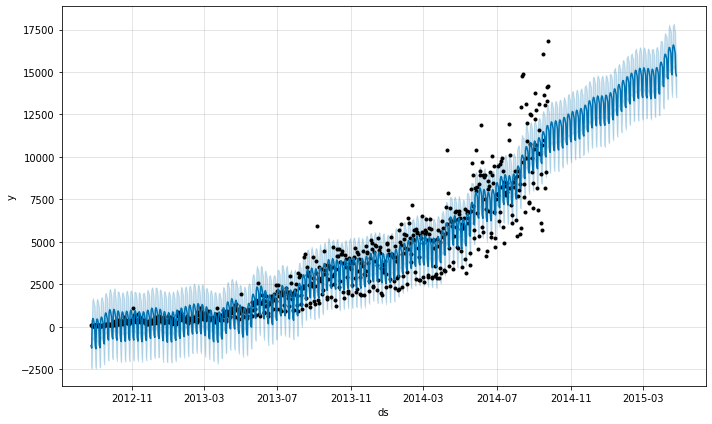

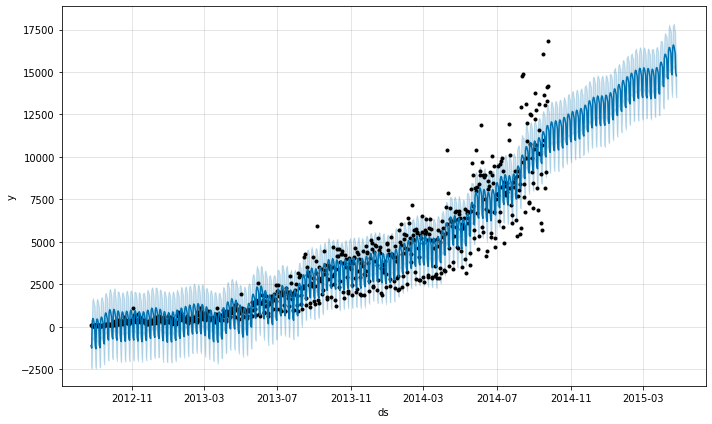

In [27]:
m.plot(forecast)

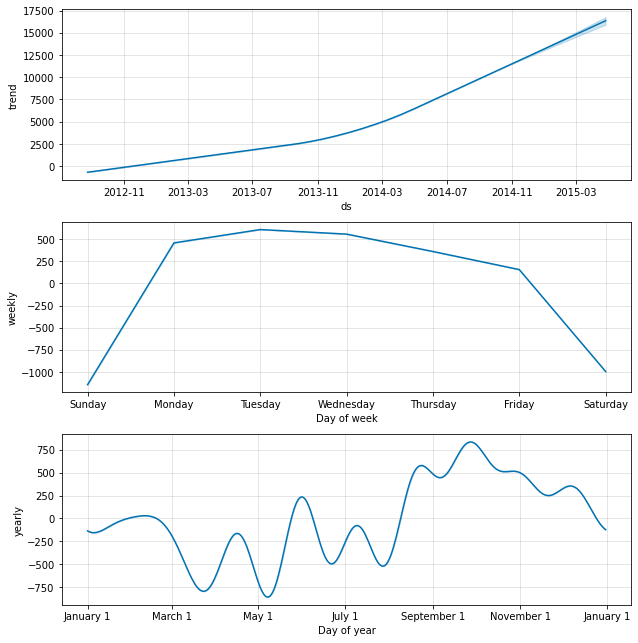

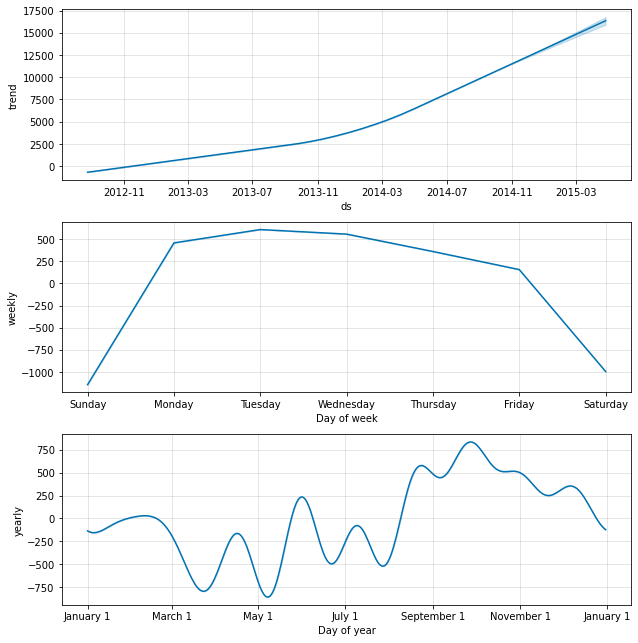

In [28]:
m.plot_components(forecast)